In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
#https://www.youtube.com/watch?v=PPcgtx0sI2E&list=WL&index=2


#NLTK
from nltk.corpus import stopwords
stop = stopwords.words('english')


#Custom
import TextFunctions

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Gather indeed data

#### Functions

In [2]:
def extract(job,location_city,location_state,page):
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36'}
    url = f'https://www.indeed.com/jobs?q={job}&l={location_city}+{location_state}&start={page}'
    r = requests.get(url, headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup



def transform(soup):
    divs = soup.find_all('div', class_ = 'cardOutline')
    for item in divs:
        title = item.find('a').text.strip()
        company = item.find('span', class_ = 'companyName').text.strip()
        location = item.find('div', class_ = 'companyLocation').text.strip()
        try:
            salary = item.find('span', class_ = 'metadata salary-snippet-container').text.strip()
        except:
            salary = ''
        summary = item.find('div', class_ = 'job-snippet').text.strip().replace('\n', '')
        job = {
            'title': title,
            'company': company,
            'location': location,
            'salary': salary,
            'summary': summary
        }
        joblist.append(job)
    return 

#### Scrape data

In [3]:
job = 'IT technician'
location_city = 'detroit'
location_state = 'michigan'
max_pages = 50

In [4]:
page = 0
joblist = []

for i in range(0,max_pages,10):
    c = extract(job,location_city,location_state,i)
    transform(c)
df = pd.DataFrame(joblist)

In [5]:
df

,title,company,location,salary,summary
0,IT Technician,Faurecia,"Sterling Heights, MI 48314+1 location",,Mentor other local technicians on Faurecia GIS...
1,IT Technician,Proactive Technology Management,"West Bloomfield Township, MI",,You will be working directly with clients and ...
2,Help Desk Administrator,Lisi Automotive Hi Vol,"Livonia, MI",,"Within the Automotive Division, Lisi Automotiv..."
3,IT Technician Level 2,Intelligent Technical Solutions,"Detroit, MI",,"To study, learn and improve their own knowledg..."
4,IT Help Desk / Imaging Technician,Re-Source Partners,"Dearborn, MI 48126",,Individual is expected to follow all company p...
...,...,...,...,...,...
70,Help Desk Technician,VERITIS GROUP INC,"Novi, MI 48375",,Bilingual Japanese Skill is not mandatory howe...
71,Technical Support Hero,Hello Innovation,"Detroit, MI 48226 (Downtown area)",,"Whether you’re training clients, helping bring..."
72,IT Support Specialist,Graham Healthcare Group,"Troy, MI 48007",,The primary job function of the IT Support Spe...
73,Computer Hardware Field Technician,TEK,"Southfield, MI",,Candidates will be taking PC hardware break fi...


### Prepare dataframe

In [6]:
# Additional stop words to remove
add_stopw = ['and']

In [7]:
df = TextFunctions.supportngcols(df, add_stopw)
df = TextFunctions.transformtext(df, add_stopw)
ngram_2, ngram_3 = TextFunctions.transform_ngram(df)

C:\Users\jwkon\Data Science Projects\RecruitmentProject\TextFunctions.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\S+@\S+','') #looking for the case of XXXX@XXXX
C:\Users\jwkon\Data Science Projects\RecruitmentProject\TextFunctions.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('http\S+','') #looking for http or https web addresses
C:\Users\jwkon\Data Science Projects\RecruitmentProject\TextFunctions.py:37: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\S+.com','') #looking for email addresses that end in '.com'
C:\Users\jwkon\Data Science Projects\RecruitmentProject\TextFunctions.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\S+.edu','') #looking for email addresses tha

In [8]:
df

,title,company,location,salary,summary,word_cnt,char_cnt,stopwords,summary_clean
0,IT Technician,Faurecia,"Sterling Heights, MI 48314+1 location",,Mentor other local technicians on Faurecia GIS...,22,154,7,mentor local technician faurecia gi policy re ...
1,IT Technician,Proactive Technology Management,"West Bloomfield Township, MI",,You will be working directly with clients and ...,22,149,7,working directly client techniciansthis person...
2,IT Support Technician,Penske Automotive Group (Main),"Bloomfield Hills, MI 48302",,Overall responsibility is to facilitate the re...,15,121,5,overall responsibility facilitate resolution t...
3,IT Help Desk / Imaging Technician,Re-Source Partners,"Dearborn, MI 48126",,Individual is expected to follow all company p...,21,142,8,individual expected follow pany policy re plet...
4,Desktop Support Specialist,North American Bancard,"Troy, MI 48083",,Must be able to provide proof of and maintain ...,26,159,8,must able provide proof maintain fully vaccina...
...,...,...,...,...,...,...,...,...,...
70,Entry-Level Service Desk Consultant,TAZ Networks,"Remote in Clinton Township, MI 48038",,Those who cannot provide superior customer ser...,20,129,8,cannot provide superior customer service skill...
71,Sr. IT Support Engineer,RR Donnelley,"Madison Heights, MI",,Communicates effectively about a broad range o...,16,120,6,communicates effectively broad range technolog...
72,Technical Support Engineer,Autonomic,"Remote in Detroit, MI 48226",,Are responsible for ensuring our customers rec...,17,123,6,responsible ensuring customer receive consiste...
73,IT Support Technician,InfuSystem Inc.,"Rochester Hills, MI 48309",,SUMMARY: The ideal candidate will possess exce...,17,153,3,summary ideal candidate posse exceptional tech...


### K-Means Classification

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


import seaborn as sns
import matplotlib.pyplot as plt

#### Functions

In [10]:
def find_features(df):
    # import libraries
   # from sklearn.preprocessing import MinMaxScaler
  #  from sklearn.decomposition import PCA

    # normalize daa with MinMaxScaler
    mms = MinMaxScaler()
    X = df
    X_mms = mms.fit_transform(X)

    # reduce dimensionality with PCA
    print('Number of features before PCA: {}'.format(len(X_mms[0])))
    pca = PCA(.9)
    X_pca = pca.fit_transform(X_mms)
    print('Number of features after PCA: {}'.format(len(X_pca[0])))
    return X_pca

In [11]:
def visualize_elbow(X_pca):
    # import libraries
    from sklearn.cluster import KMeans
    from yellowbrick.cluster import KElbowVisualizer

    # create a kmeans model
    model = KMeans(random_state=42)

    # use the KElbowVisualizer to calculate distortion for different numbers of clusters
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(X_pca)
    visualizer.show()

In [12]:
def fit_cluster(opt_cluster, df, X_pca):
    # import libraries
    from sklearn.cluster import KMeans
    from yellowbrick.cluster import KElbowVisualizer
    kmeans = KMeans(n_clusters=opt_cluster, random_state=42)
    prediction = kmeans.fit_predict(X_pca)
    # import libraries
    import seaborn as sns
    import matplotlib.pyplot as plt

    # first PCA component
    pca1 = [val[0] for val in X_pca]
    # second PCA component
    pca2 = [val[1] for val in X_pca]

    # add the cluster and PCA components to the dataframe
    df_viz = df.copy(deep=True)
    df_viz['Cluster'] = prediction
    df_viz['PCA 1'] = pca1
    df_viz['PCA 2'] = pca2

    # plot scatter plot
    sns.scatterplot(data=df_viz, x='PCA 1', y='PCA 2', hue='Cluster')
    plt.title('Customer Segmentation With K-Means')
    plt.show()
    return df_viz

In [13]:
def transform_features(df):
    from sklearn import preprocessing
    #Convert Categorical columns to numeric
    
    encoder = {}
    ##df_diversion_participants_NUM_cols = df_diversion_participants.drop(['ARREST_DATE', 'COMMITMENT_TERM','CASE_ID','CASE_PARTICIPANT_ID', 'CHARGE_ID'], axis=1).select_dtypes(include=[np.number]).columns
    colsNum = df.select_dtypes(np.number).columns
    colsCat = df.columns.difference(colsNum)
    df[colsNum] = df[colsNum]
    df[colsCat] = df[colsCat]

    for col in colsCat:
        encoder[col] = preprocessing.LabelEncoder() 
        df[col] = encoder[col].fit_transform(df[col])
    return df,colsCat,colsNum,encoder

#### Analysis

Number of features before PCA: 9
Number of features after PCA: 6


C:\Users\jwkon\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jwkon\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jwkon\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jwkon\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarn

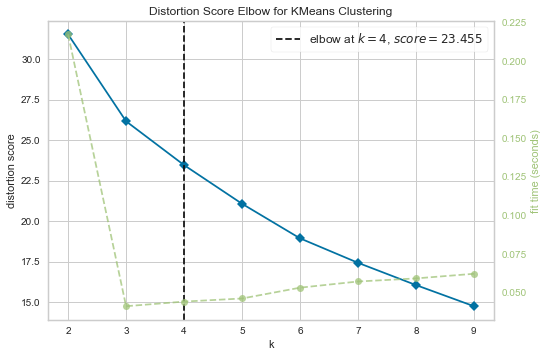

In [14]:
df,colsCat,colsNum,encoder = transform_features(df)
X_pca = find_features(df)
visualize_elbow(X_pca)

C:\Users\jwkon\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


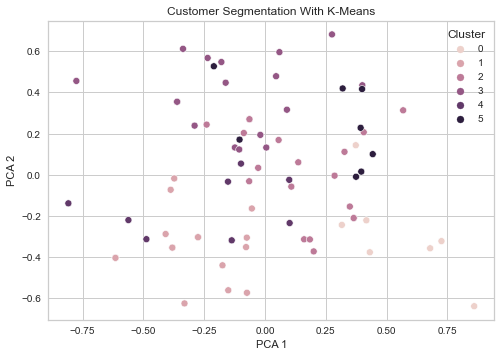

In [15]:
df_viz = fit_cluster(6, df, X_pca)

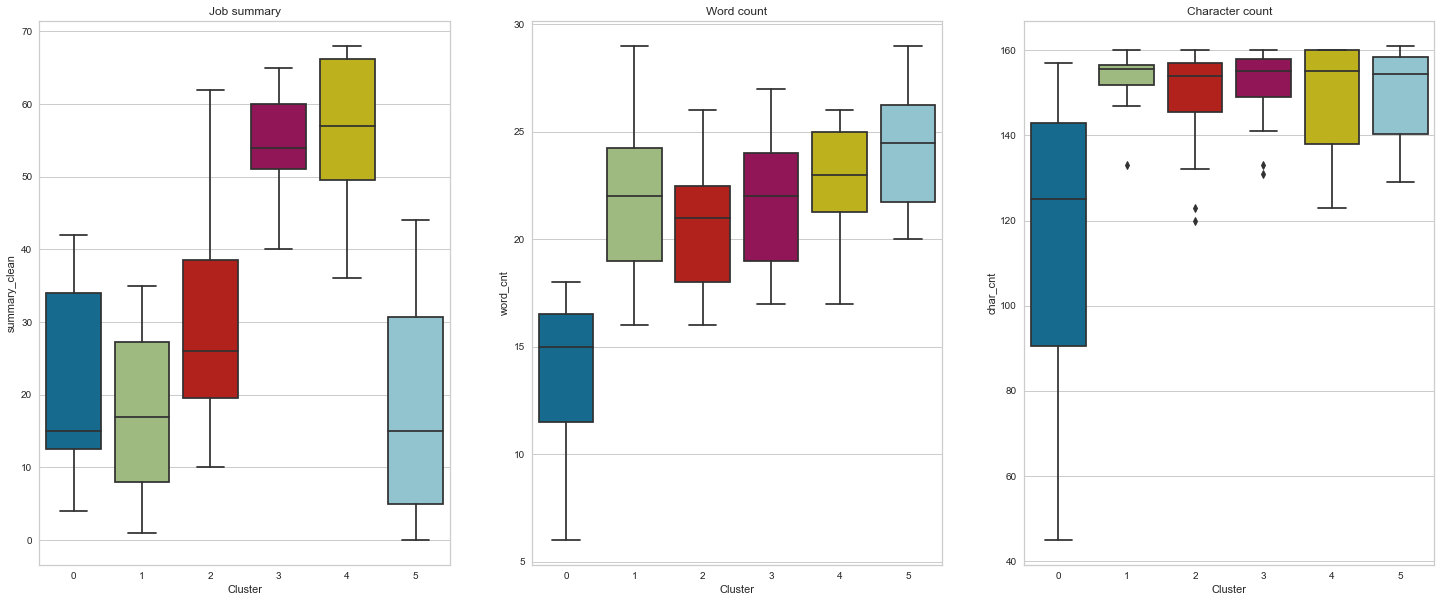

In [16]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots to show age, work experience, and family size for each cluster
fig, axes = plt.subplots(1, 3, figsize=(25,10))
ax = sns.boxplot(ax=axes[0], x="Cluster", y="summary_clean", data=df_viz)
ax.title.set_text('Job summary')
ax2 = sns.boxplot(ax=axes[1], x="Cluster", y="word_cnt", data=df_viz)
ax2.title.set_text('Word count')
ax3 = sns.boxplot(ax=axes[2], x="Cluster", y="char_cnt", data=df_viz)
ax3.title.set_text('Character count')
plt.show()

In [17]:
# Convert df back to categorical/original
for col in colsCat: 
    df_viz[col] = encoder[col].inverse_transform(df_viz[col])
df_viz.head()

,title,company,location,salary,summary,word_cnt,char_cnt,stopwords,summary_clean,Cluster,PCA 1,PCA 2
0,IT Technician,Faurecia,"Sterling Heights, MI 48314+1 location",,Mentor other local technicians on Faurecia GIS...,22,154,7,mentor local technician faurecia gi policy re ...,1,-0.388036,-0.072529
1,IT Technician,Proactive Technology Management,"West Bloomfield Township, MI",,You will be working directly with clients and ...,22,149,7,working directly client techniciansthis person...,3,-0.235899,0.567173
2,IT Support Technician,Penske Automotive Group (Main),"Bloomfield Hills, MI 48302",,Overall responsibility is to facilitate the re...,15,121,5,overall responsibility facilitate resolution t...,0,0.373184,0.143592
3,IT Help Desk / Imaging Technician,Re-Source Partners,"Dearborn, MI 48126",,Individual is expected to follow all company p...,21,142,8,individual expected follow pany policy re plet...,5,0.395843,0.015613
4,Desktop Support Specialist,North American Bancard,"Troy, MI 48083",,Must be able to provide proof of and maintain ...,26,159,8,must able provide proof maintain fully vaccina...,2,-0.028120,0.033881


In [126]:
title_grouped = df_viz.groupby(['title','Cluster']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Total_postings'})

In [118]:
title_grouped.head()

,title,Cluster,Total_postings
0,IT Technician,1,6
1,Help Desk Technician,0,2
2,IT Support Specialist,1,2
3,IT Technical Support,2,2
4,IT Specialist,2,2


In [77]:
# create a function to generate pie charts for a given categorical feature
def plot_titles(y,x):
    # Create subsets for each cluster
    df_0 = title_grouped[title_grouped['Cluster']== 0]
    df_1 = title_grouped[title_grouped['Cluster']== 1]
    df_2 = title_grouped[title_grouped['Cluster']== 2]
    df_3 = title_grouped[title_grouped['Cluster']== 3]
    df_4 = title_grouped[title_grouped['Cluster']== 4]
    df_5 = title_grouped[title_grouped['Cluster']== 5]

    fig, ax = plt.subplots(2, 3, figsize=(25,10))
    ax[0,0].barh(df_0[y],df_0[x].sort_values(ascending=True), align='center')
    ax[0,0].title.set_text('Cluster 0')
    ax[0,1].barh(df_1[y], df_1[x].sort_values(ascending=True), align='center')
    ax[0,1].title.set_text('Cluster 1')
    ax[1,0].barh(df_2[y], df_2[x].sort_values(ascending=True), align='center')
    ax[1,0].title.set_text('Cluster 2')
    ax[1,1].barh(df_3[y], df_3[x].sort_values(ascending=True), align='center')
    ax[1,1].title.set_text('Cluster 3')
    ax[0,2].barh(df_4[y], df_4[x].sort_values(ascending=True), align='center')
    ax[0,2].title.set_text('Cluster 4')
    ax[1,2].barh(df_5[y], df_5[x].sort_values(ascending=True), align='center')
    ax[1,2].title.set_text('Cluster 5')


    plt.tight_layout()
    plt.show()

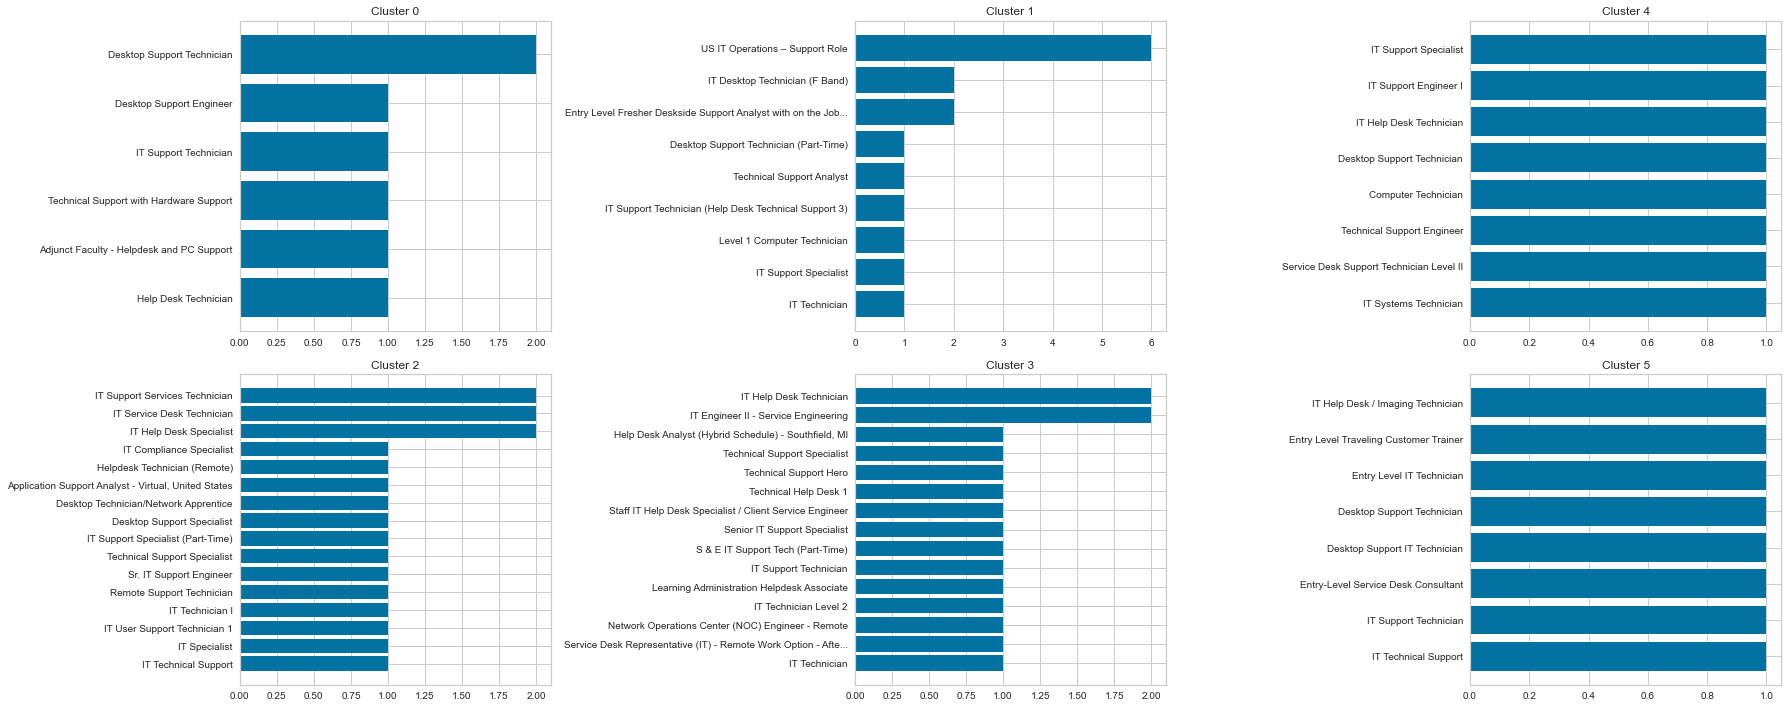

In [78]:
plot_titles('title','Total_postings')

In [102]:
df_pivoted = pd.pivot_table(data=title_grouped, index='title', values = 'Total_postings', columns='Cluster')

In [98]:
title_grouped = title_grouped['Cluster'] = title_grouped['Cluster'].map(str)

In [105]:
df_pivoted.unstack().reset_index()

,Cluster,title,0
0,0,Adjunct Faculty - Helpdesk and PC Support,1.0
1,0,"Application Support Analyst - Virtual, United ...",NaN
2,0,Computer Technician,NaN
3,0,Desktop Support Engineer,1.0
4,0,Desktop Support IT Technician,NaN
...,...,...,...
313,5,Technical Support Engineer,NaN
314,5,Technical Support Hero,NaN
315,5,Technical Support Specialist,NaN
316,5,Technical Support with Hardware Support,NaN


In [88]:
title_piv = title_grouped.pivot(index='title',columns='Cluster').reset_index()
title_piv.columns = title_piv.columns.droplevel(0)

AttributeError: 'Series' object has no attribute 'pivot'

<AxesSubplot:xlabel='Total_postings', ylabel='Cluster'>

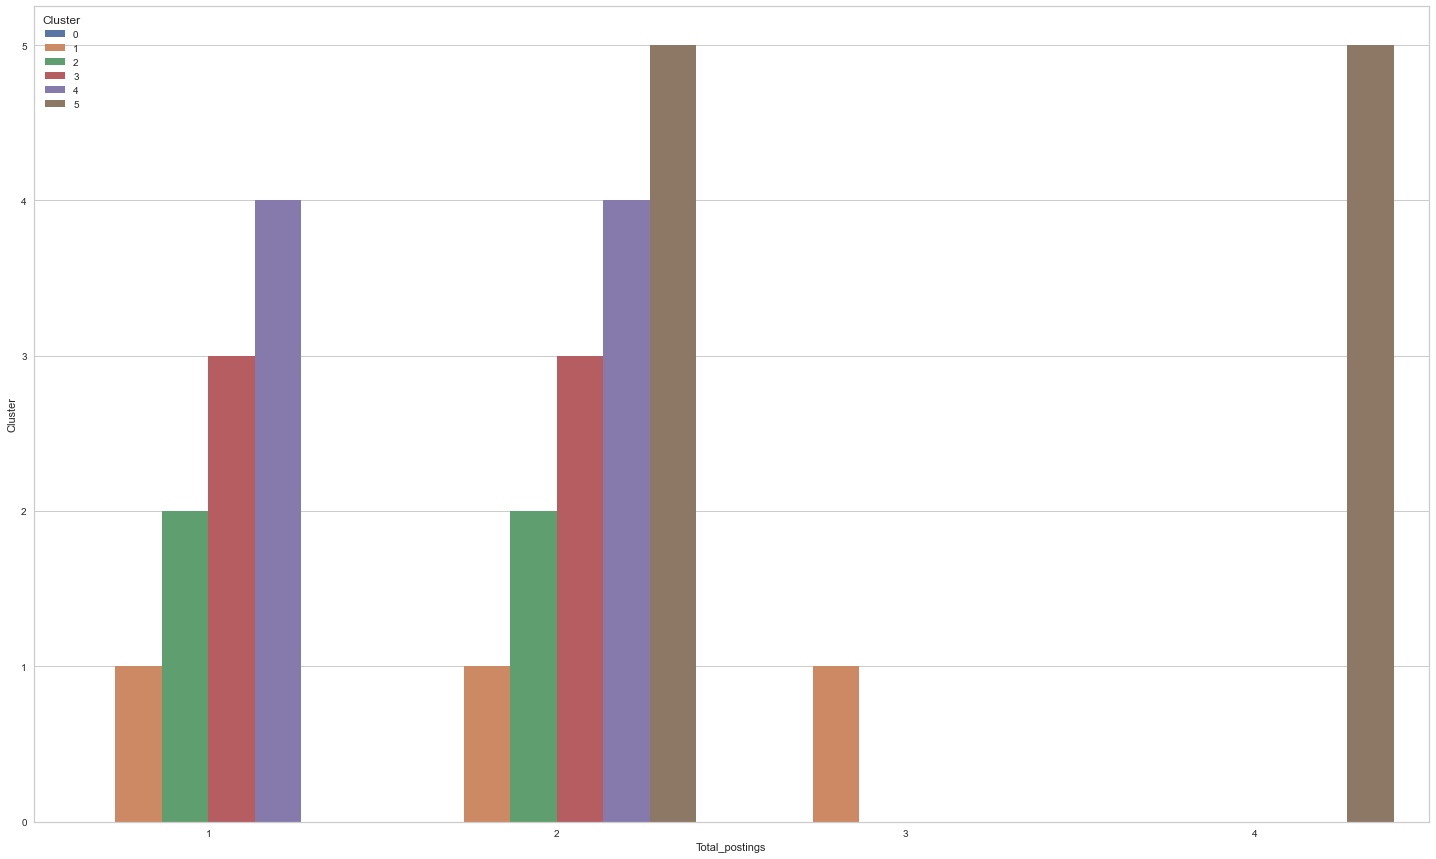

In [122]:
plt.figure(figsize=(25, 15))
sns.barplot(x='Total_postings', y='Cluster', data=title_grouped, palette="deep",
            hue="Cluster", color="b")